In [43]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout,SimpleRNN, GRU, Activation
from tensorflow.keras.models import Sequential
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from cv2 import imread, resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

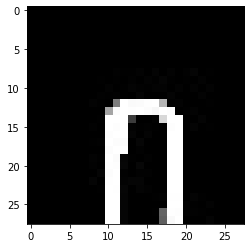

(28, 28, 3)

In [44]:
base_dir = '../input/mramr-dataset/MR-AMR Dataset'
image = mpimg.imread('../input/mramr-dataset/MR-AMR Dataset/0/10C 32860.jpg')
plt.imshow(image)
plt.show()
image.shape

In [45]:
IMAGE_SIZE=28
BATCH_SIZE=32

In [46]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     validation_split=0.2,
     fill_mode='nearest'
    )

In [47]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     validation_split=0.2,
     fill_mode='nearest'
)

In [48]:
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    class_mode='categorical',
    seed=42
)

Found 112004 images belonging to 10 classes.


In [49]:
test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 27996 images belonging to 10 classes.


In [50]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [51]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5,min_delta=0.001,restore_best_weights=True)

In [52]:
optimizer = Adam(learning_rate=0.001)

In [53]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [54]:
STEP_SIZE_TRAIN = train_datagen.n//train_datagen.batch_size
STEP_SIZE_VALID = test_datagen.n//test_datagen.batch_size

In [55]:
history = model.fit(train_datagen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100,
                    validation_data=test_datagen,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=[reduce_lr])

Epoch 1/100
3500/3500 [==============================] - 808s 231ms/step - loss: 1.7635 - accuracy: 0.3721 - val_loss: 1.2234 - val_accuracy: 0.5666
Epoch 2/100
3500/3500 [==============================] - 263s 75ms/step - loss: 1.1471 - accuracy: 0.5838 - val_loss: 0.8977 - val_accuracy: 0.6745
Epoch 3/100
3500/3500 [==============================] - 208s 59ms/step - loss: 0.9609 - accuracy: 0.6528 - val_loss: 0.7233 - val_accuracy: 0.7400
Epoch 4/100
3500/3500 [==============================] - 206s 59ms/step - loss: 0.8602 - accuracy: 0.6903 - val_loss: 0.6655 - val_accuracy: 0.7672
Epoch 5/100
3500/3500 [==============================] - 205s 58ms/step - loss: 0.8062 - accuracy: 0.7115 - val_loss: 0.6032 - val_accuracy: 0.7888
Epoch 6/100
3500/3500 [==============================] - 205s 59ms/step - loss: 0.7586 - accuracy: 0.7261 - val_loss: 0.5571 - val_accuracy: 0.8060
Epoch 7/100
3500/3500 [==============================] - 201s 57ms/step - loss: 0.7303 - accuracy: 0.7392 - val

In [56]:
model_loss = pd.DataFrame(model.history.history)


Text(0, 0.5, 'accuracy')

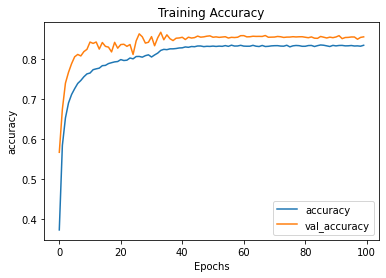

In [57]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [58]:
from tensorflow.keras.models import save_model
save_model(model, "model.h5")